In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [7]:
sgcredit_df = pd.read_table("../data/SouthGermanCredit/SouthGermanCredit.asc", header=0, sep=None)

/home/nic/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
sgcredit_df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [15]:
#Change column names from German to English

sgcredit_df = sgcredit_df.rename(columns=({"laufkont" : "status", "laufzeit" : "duration", "moral" : "credit history", "verw" : "purpose", "hoehe" : "amount", 
                    "sparkont" : "savings", "beszeit" : "employment duration", "rate" : "installment rate",
                    "famges" : "personal status sex", "buerge" : "other debtors",
                    "wohnzeit" : "present residence", "verm" : "property",
                    "alter" : "age", "weitkred" : "other installment plans",
                    "wohn" : "housing", "bishkred" : "number credits",
                    "beruf" : "job", "pers" : "people liable", "telef" : "telephone", "gastarb" : "foreign worker",
                    "kredit" : "credit risk"}))

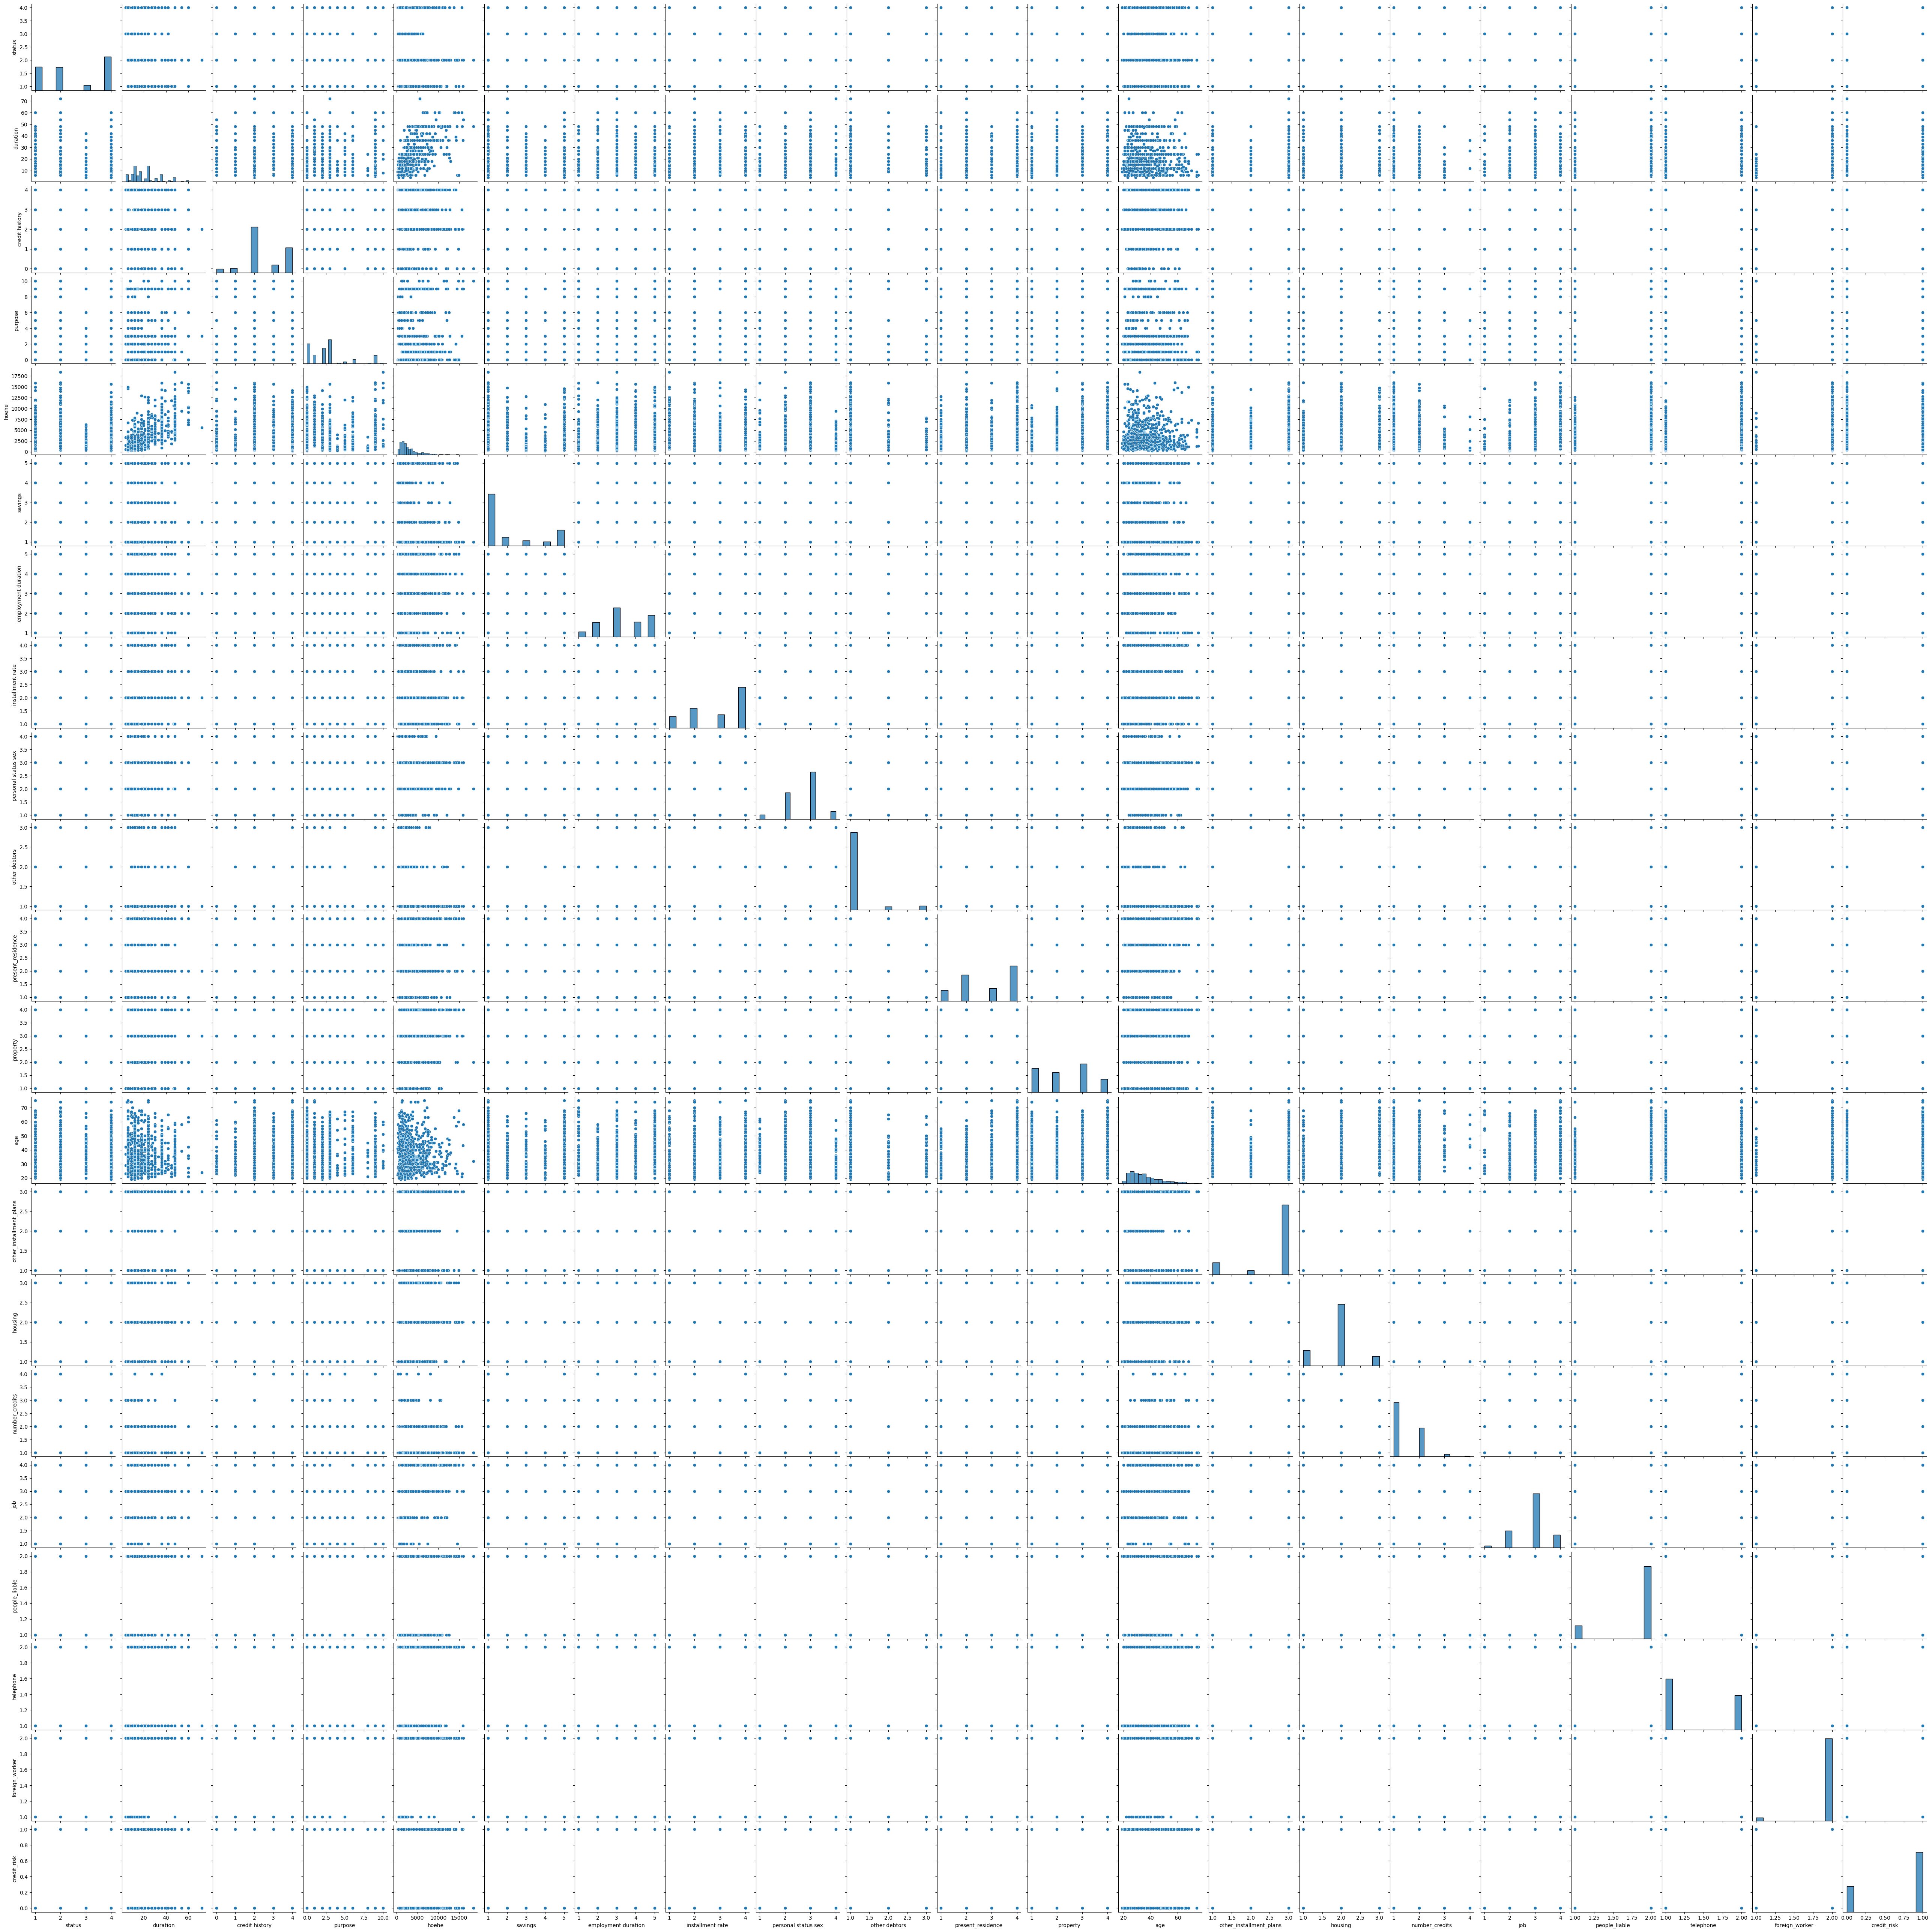

In [14]:
sns.pairplot(sgcredit_df)

In [16]:
sgcredit_df.sample(15)

,status,duration,credit history,purpose,amount,savings,employment duration,installment rate,personal status sex,other debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
103,2,36,3,0,7432,1,3,2,2,1,...,2,54,3,1,1,3,2,1,2,1
570,3,12,2,0,1330,1,2,4,3,1,...,1,26,3,2,1,3,2,1,2,1
988,1,18,2,0,976,1,2,1,2,1,...,3,23,3,2,1,2,2,1,2,0
924,1,21,3,6,3414,1,2,2,3,1,...,2,26,2,2,2,3,2,1,2,0
488,4,12,2,9,1076,1,3,2,4,1,...,1,26,3,2,1,3,2,2,2,1
105,4,24,2,0,1393,1,3,2,3,3,...,1,31,3,2,1,3,2,2,2,1
458,2,24,3,2,2333,5,2,4,3,1,...,2,29,1,2,1,2,2,1,2,1
799,3,24,2,0,947,1,4,4,3,1,...,4,38,1,3,1,3,1,1,2,0
104,4,24,4,3,1851,1,4,4,4,3,...,3,33,3,2,2,3,2,2,2,1
894,2,24,3,2,2064,1,1,3,2,1,...,2,34,3,2,1,4,2,2,2,0


array([[<AxesSubplot:xlabel='status', ylabel='status'>,
        <AxesSubplot:xlabel='duration', ylabel='status'>,
        <AxesSubplot:xlabel='credit history', ylabel='status'>,
        <AxesSubplot:xlabel='purpose', ylabel='status'>,
        <AxesSubplot:xlabel='amount', ylabel='status'>,
        <AxesSubplot:xlabel='savings', ylabel='status'>,
        <AxesSubplot:xlabel='employment duration', ylabel='status'>,
        <AxesSubplot:xlabel='installment rate', ylabel='status'>,
        <AxesSubplot:xlabel='personal status sex', ylabel='status'>,
        <AxesSubplot:xlabel='other debtors', ylabel='status'>,
        <AxesSubplot:xlabel='present_residence', ylabel='status'>,
        <AxesSubplot:xlabel='property', ylabel='status'>,
        <AxesSubplot:xlabel='age', ylabel='status'>,
        <AxesSubplot:xlabel='other_installment_plans', ylabel='status'>,
        <AxesSubplot:xlabel='housing', ylabel='status'>,
        <AxesSubplot:xlabel='number_credits', ylabel='status'>,
        <Axes

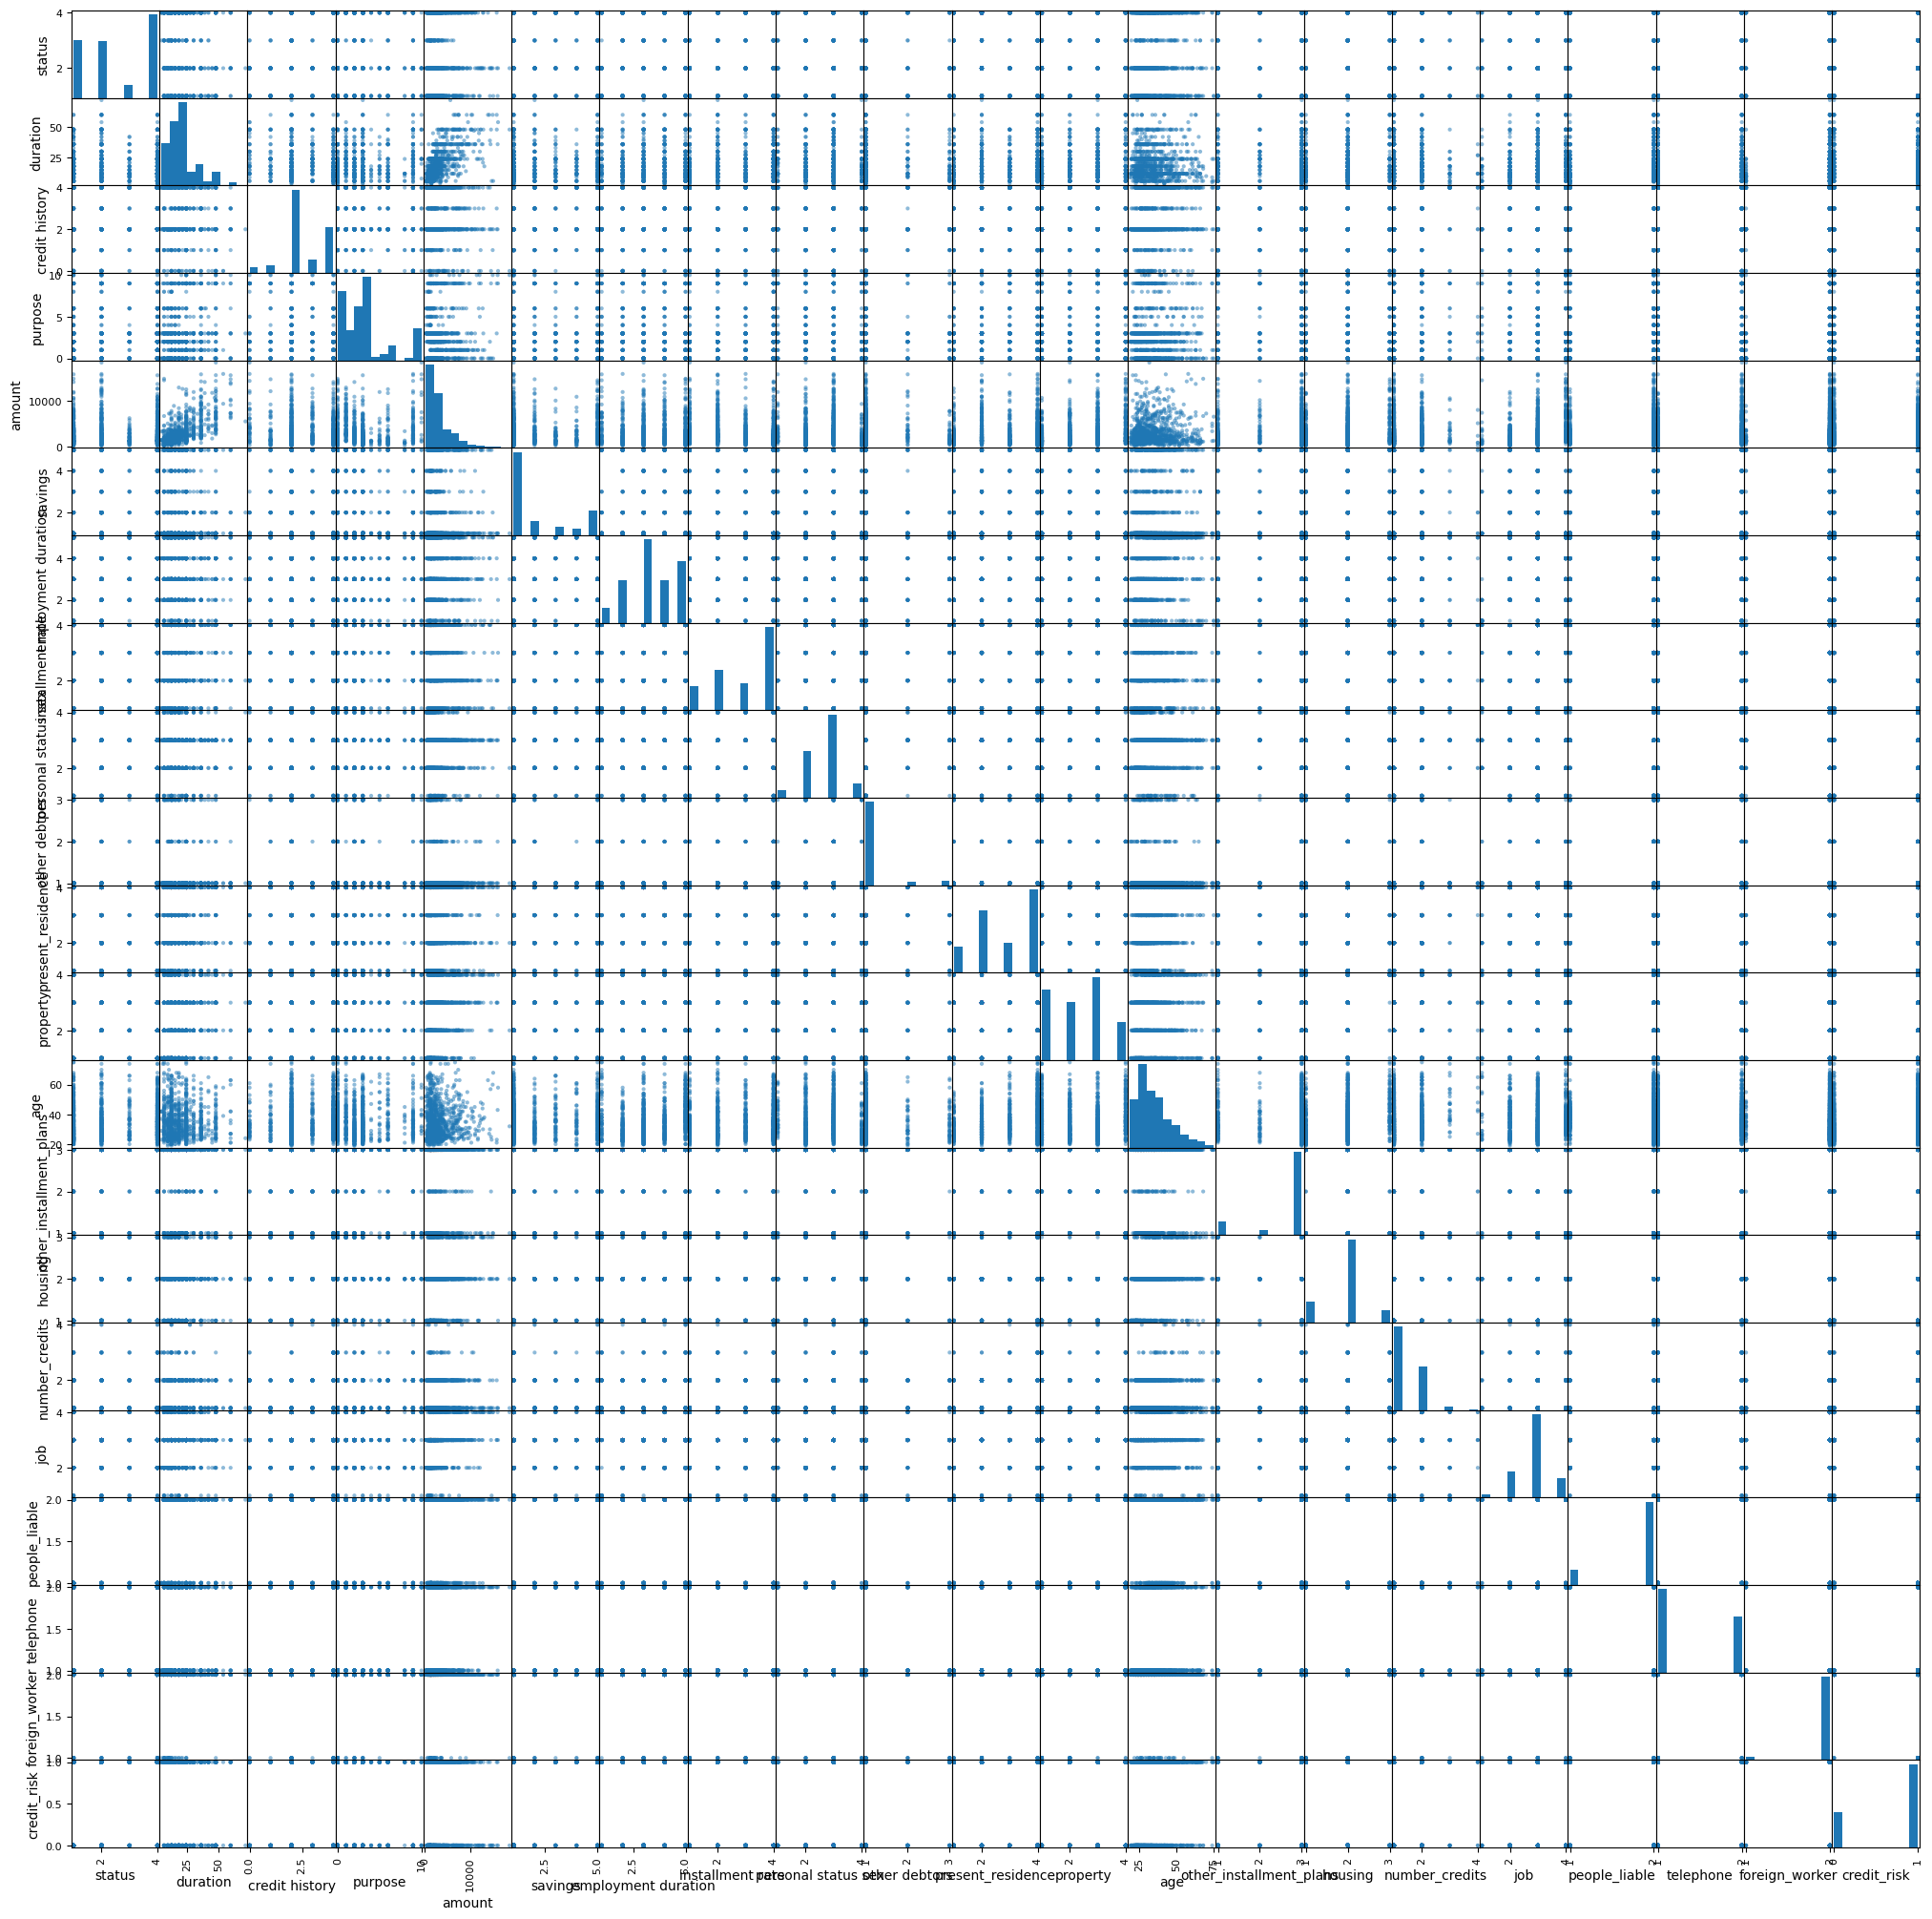

In [20]:
scatter_matrix(sgcredit_df, figsize=(25,25))

In [25]:

X = sgcredit_df[["amount"]].values
y = sgcredit_df['age'].values
x_axis = np.linspace(0,1,len(X))

lr_model = LinearRegression()
lr_model.fit(X.reshape(-1, 1), y)

LinearRegression()

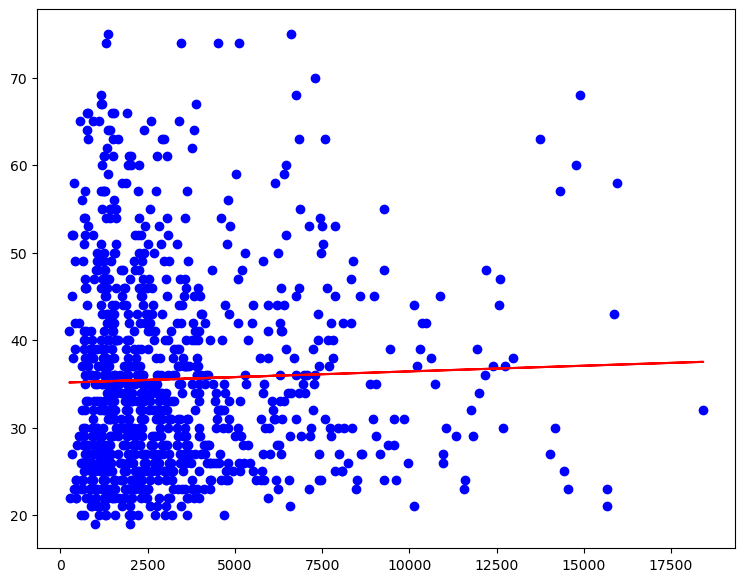

In [26]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter((X.reshape(-1,1)),y, color='blue')
ax.plot((X.reshape(-1,1)),lr_model.predict(X.reshape(-1,1)), color='red')

/home/nic/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

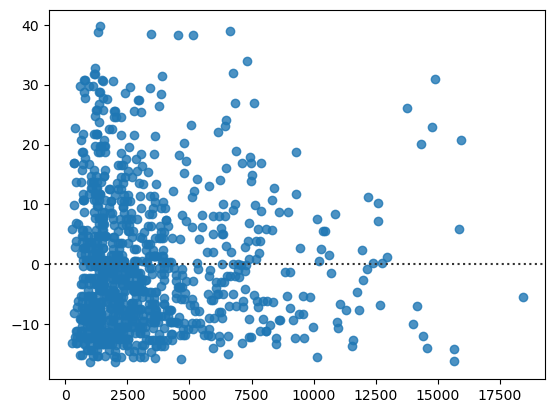

In [27]:
x = X.reshape(-1,1)
sns.residplot(x,y)

<AxesSubplot:>

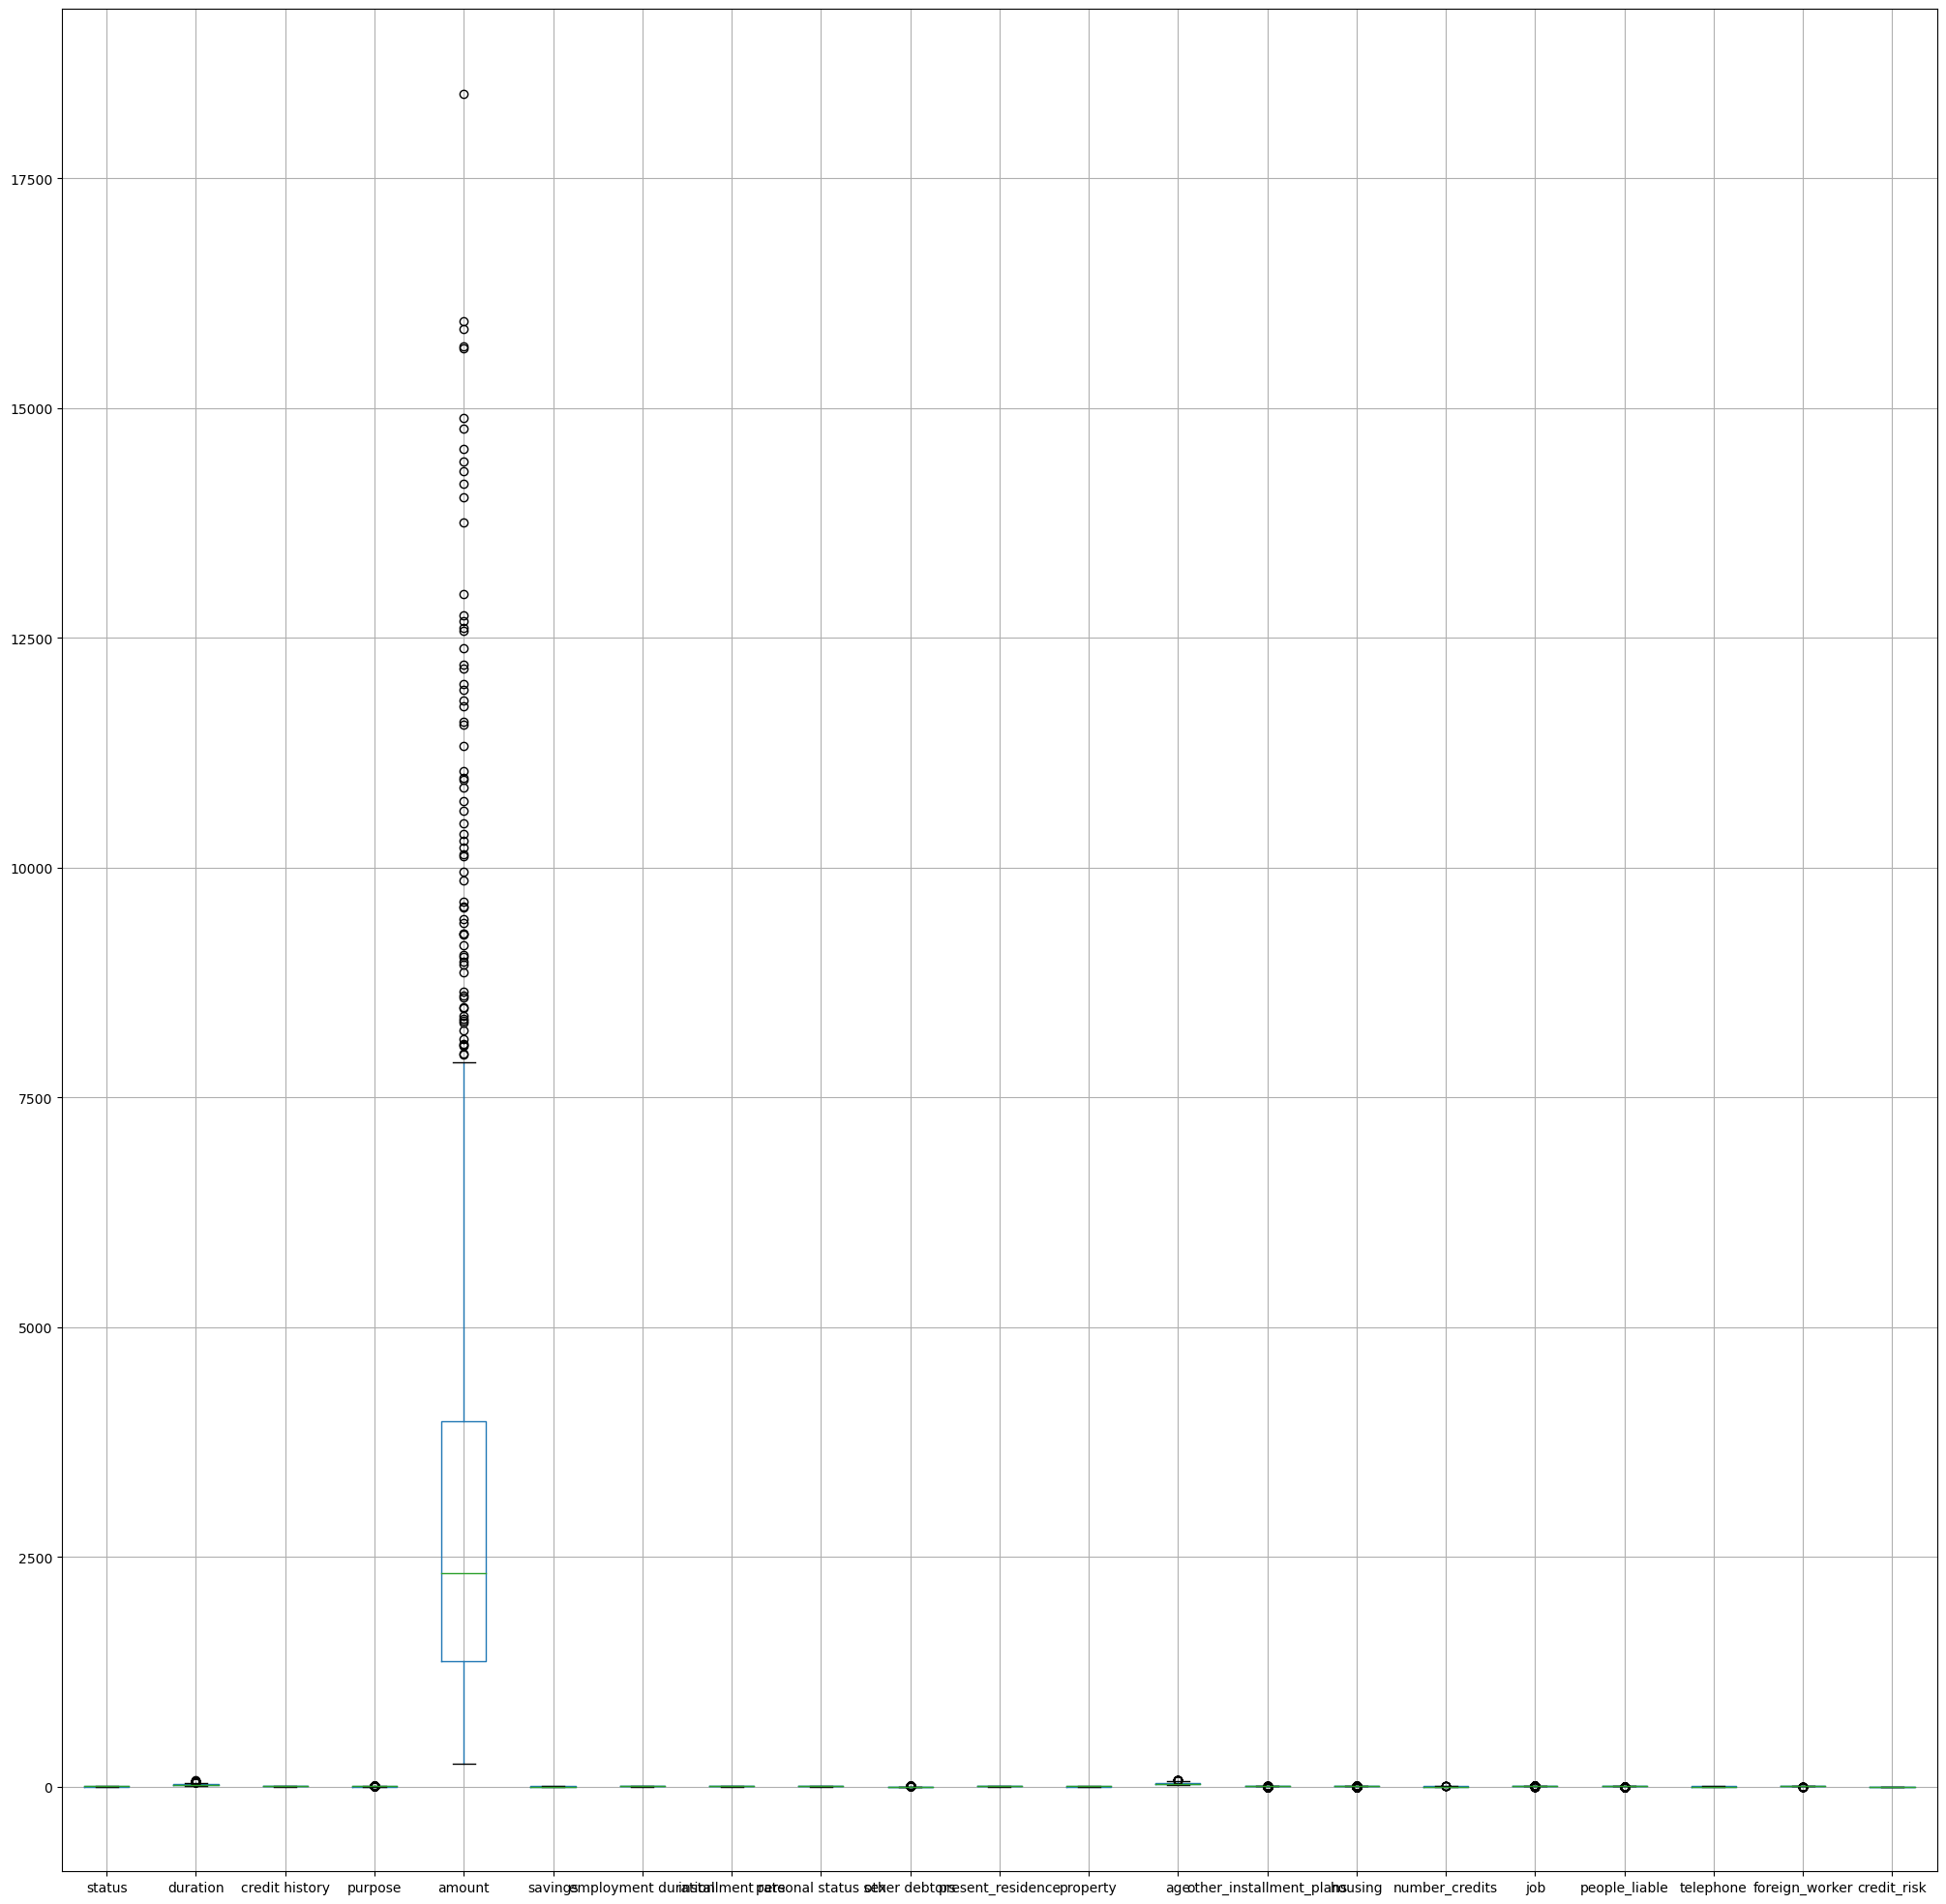

In [33]:
sgcredit_df.boxplot(figsize=(25,25))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)